# Athelete Profile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from features.utils import *
from features.athlete_profile import *

In [2]:
# Load Data
data = loadData()
data.head()

,ID de l'activité,Date de l'activité,Nom de l'activité,Type d'activité,Description de l'activité,Temps écoulé,Mesure d'effort,Équipement utilisé pour l'activité,Nom du fichier,Poids de l'athlète,...,Puissance moyenne pondérée,Nombre d'échantillons de puissance,Humidité,Vitesse du vent,Couverture nuageuse,Indice UV,Date,Time,Week,Month
0,102155537,27 déc. 2013 à 12:35:59,Enfin la reprise !,Vélo,NaN,51.60,NaN,NaN,activities/102155537.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-27,12:35:59,52,12
1,102581269,29 déc. 2013 à 12:06:22,"I2/3, pointes I4",Vélo,NaN,92.28,NaN,NaN,activities/102581269.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-29,12:06:22,52,12
2,103191732,1 janv. 2014 à 11:22:39,SG / I2 en souplesse,Vélo,NaN,145.17,NaN,NaN,activities/103191732.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01,11:22:39,1,1
3,104215700,5 janv. 2014 à 12:17:58,SG à I3 - avec Nico et Pascal,Vélo,NaN,197.43,NaN,NaN,activities/104215700.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05,12:17:58,1,1
4,106526947,15 janv. 2014 à 12:32:41,Sortie club - Fartlek,Vélo,NaN,156.48,NaN,NaN,activities/106526947.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-15,12:32:41,3,1


In [3]:
data.columns

Index(['ID de l'activité', 'Date de l'activité', 'Nom de l'activité',
       'Type d'activité', 'Description de l'activité', 'Temps écoulé',
       'Mesure d'effort', 'Équipement utilisé pour l'activité',
       'Nom du fichier', 'Poids de l'athlète', 'Poids du vélo',
       'Durée de déplacement', 'Distance', 'Vitesse max.', 'Vitesse moyenne',
       'Dénivelé positif', 'Dénivelé négatif', 'Altitude min.',
       'Altitude max.', 'Pente max.', 'Pente moyenne', 'Cadence max.',
       'Cadence moyenne', 'Fréquence cardiaque maximum',
       'Fréquence cardiaque moyenne', 'Puissance moyenne', 'Calories',
       'Température moyenne', 'Puissance moyenne pondérée',
       'Nombre d'échantillons de puissance', 'Humidité', 'Vitesse du vent',
       'Couverture nuageuse', 'Indice UV', 'Date', 'Time', 'Week', 'Month'],
      dtype='object')

### Metrics

In [16]:
# set athlete stats
max_HR = 190
ftp = 405

In [17]:
#Sub df for metrics, needed columns and no na in HR
sub_df = create_sub_df(data)
sub_df

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Mesure d'effort,Puissance moyenne pondérée
0,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,54.0,NaN
1,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,55.0,NaN
2,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,154.0,NaN
3,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,16.0,NaN
4,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,112.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,46.0,400.0
1173,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,272.0,335.0
1174,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,1.0,204.0
1175,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,26.0,229.0


In [18]:
sub_df.columns

Index(['Date', 'Time', 'Nom du fichier', 'Durée de déplacement', 'Distance',
       'Fréquence cardiaque moyenne', 'Fréquence cardiaque maximum',
       'Vitesse moyenne', 'Cadence moyenne', 'Puissance moyenne',
       'Poids de l'athlète', 'Mesure d'effort', 'Puissance moyenne pondérée'],
      dtype='object')

#### FTP

Your Functional Threshold Power (FTP) is the maximum average power that you can hold for one continuous hour. For example, if you were to ride a 40k time trial in 60 minutes at an average power of 275W, your FTP would be 275W.

<AxesSubplot: xlabel='Puissance moyenne', ylabel='Count'>

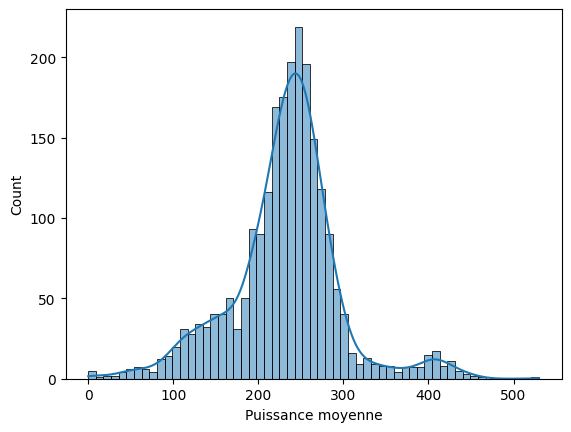

In [19]:
sns.histplot(data=data, x='Puissance moyenne', kde=True)

#### Heart Rate Zones

In [20]:
hr_data = calculate_hr_zones_hrmax(190)
hr_data

,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,95.000,111.150,< 111
1,2,Moderate,111.150,147.668,111 - 148
2,3,Tempo,147.668,165.300,148 - 165
3,4,Threshold,165.300,184.091,165 - 184
4,5,Anaerobic,184.091,inf,>184


Sub divide zone for Relative Effort calculation Accuracy

In [21]:
RE_hr_data = calculate_hr_zones_elevate(190)
RE_hr_data

,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,95.0,114.0,< 114
1,2,Moderate,114.0,133.0,114 - 133
2,3,Tempo,133.0,152.0,133 - 152
3,4,Threshold,152.0,171.0,152 - 171
4,5,Anaerobic,171.0,190.0,171 - 190
5,6,Max,190.0,inf,>190


In [22]:
sub_df = intensity_score(sub_df, 'Puissance moyenne pondérée', ftp)
sub_df

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Mesure d'effort,Puissance moyenne pondérée,intensity_score
0,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,54.0,NaN,NaN
1,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,55.0,NaN,NaN
2,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,154.0,NaN,NaN
3,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,16.0,NaN,NaN
4,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,112.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,46.0,400.0,99.0
1173,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,272.0,335.0,83.0
1174,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,1.0,204.0,50.0
1175,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,26.0,229.0,57.0


#### Time in Zones

In [24]:
def calculate_time_in_zones_RE(df, hr_data):
    """
    Calculate the time spent in each heart rate zone for each activity and add the results as columns.
    
    Args:
    - df (pandas.DataFrame): A DataFrame containing information about each activity.
    - hr_data (pandas.DataFrame): A DataFrame containing the heart rate zones and corresponding upper and lower bounds.
    
    Returns:
    - df (pandas.DataFrame): The original DataFrame with new columns for the time spent in each heart rate zone.
    """
        
    # Loop through the rows in df and calculate time spent in each zone for the corresponding activity
    for index, row in df.iterrows():    
    # Extract activity id from the file name column
        if "Nom du fichier" in row:
            activity_num = str(row["Nom du fichier"]).split("/")[-1].split(".")[0]
            # Load the activity data
            activity_file = f"data/activities_csv/{activity_num}.csv"
        else:
            activity_num = row['nom']
            activity_file = f"data/strava_test_csv/{activity_num}.csv"
            
        csv_data = pd.read_csv(activity_file)
        # Check if the original column names exist
        if 'timestamp' in csv_data.columns and 'heart_rate' in csv_data.columns:
            csv_data = csv_data[['timestamp', 'heart_rate']]
        else:
            # Use alternative column names
            csv_data = csv_data[['time', 'heart_rate_bpm']]
            csv_data = csv_data.rename(columns={'time': 'timestamp', 'heart_rate_bpm': 'heart_rate'})

        # Calculate the time spent in each zone
        for index_2, row_2 in csv_data.iterrows():
            if row_2["heart_rate"] < hr_data["Upper Bound"].iloc[0]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[0]
            elif hr_data["Lower Bound"].iloc[1] < row_2["heart_rate"] < hr_data["Upper Bound"].iloc[1]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[1]
            elif hr_data["Lower Bound"].iloc[2] < row_2["heart_rate"] < hr_data["Upper Bound"].iloc[2]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[2]
            elif hr_data["Lower Bound"].iloc[3] < row_2["heart_rate"] < hr_data["Upper Bound"].iloc[3]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[3]
            elif hr_data["Lower Bound"].iloc[4] < row_2["heart_rate"] < hr_data["Upper Bound"].iloc[4]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[4]
            elif row_2["heart_rate"] > hr_data["Lower Bound"].iloc[5]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[5]

        # Group by zone and calculate the percentage of time spent in each zone
        csv_grouped = csv_grouped = csv_data.groupby("Zone").agg({'timestamp':'count', 'heart_rate':'mean'}).rename(columns={"timestamp": "Count", "heart_rate": 'avg_HR'}).reset_index()
        csv_grouped['perc'] = round(csv_grouped['Count'] / len(csv_data), 2)
        

        # Add new columns with time spent in each zone to df
        try:
            df.loc[index, "time_z1"] = csv_grouped[csv_grouped["Zone"] == 1]["perc"].values[0]
            df.loc[index, "avgHR_z1"] = csv_grouped[csv_grouped["Zone"] == 1]["avg_HR"].values[0]
        except IndexError:
            df.loc[index, "time_z1"] = 0
            df.loc[index, "avgHR_z1"] = 0
        try:
            df.loc[index, "time_z2"] = csv_grouped[csv_grouped["Zone"] == 2]["perc"].values[0]
            df.loc[index, "avgHR_z2"] = csv_grouped[csv_grouped["Zone"] == 2]["avg_HR"].values[0]
        except IndexError:
            df.loc[index, "time_z2"] = 0
            df.loc[index, "avgHR_z2"] = 0
        try:
            df.loc[index, "time_z3"] = csv_grouped[csv_grouped["Zone"] == 3]["perc"].values[0]
            df.loc[index, "avgHR_z3"] = csv_grouped[csv_grouped["Zone"] == 3]["avg_HR"].values[0]
        except IndexError:
            df.loc[index, "time_z3"] = 0
            df.loc[index, "avgHR_z3"] = 0
        try:
            df.loc[index, "time_z4"] = csv_grouped[csv_grouped["Zone"] == 4]["perc"].values[0]
            df.loc[index, "avgHR_z4"] = csv_grouped[csv_grouped["Zone"] == 4]["avg_HR"].values[0]
        except IndexError:
            df.loc[index, "time_z4"] = 0
            df.loc[index, "avgHR_z4"] = 0
        try:
            df.loc[index, "time_z5"] = csv_grouped[csv_grouped["Zone"] == 5]["perc"].values[0]
            df.loc[index, "avgHR_z5"] = csv_grouped[csv_grouped["Zone"] == 5]["avg_HR"].values[0]
        except IndexError:
            df.loc[index, "time_z5"] = 0
            df.loc[index, "avgHR_z5"] = 0
        try:
            df.loc[index, "time_z6"] = csv_grouped[csv_grouped["Zone"] == 6]["perc"].values[0]
            df.loc[index, "avgHR_z6"] = csv_grouped[csv_grouped["Zone"] == 6]["avg_HR"].values[0]
        except IndexError:
            df.loc[index, "time_z6"] = 0
            df.loc[index, "avgHR_z6"] = 0
    
    return df

zone_data = calculate_time_in_zones_RE(sub_df, RE_hr_data)
zone_data.to_csv("data/zone_data_6.csv")

In [25]:
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,time_z2,avgHR_z2,time_z3,avgHR_z3,time_z4,avgHR_z4,time_z5,avgHR_z5,time_z6,avgHR_z6
0,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,...,0.30,122.521127,0.12,142.103448,0.26,161.883562,0.02,173.714286,0.0,0.0
1,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,...,0.22,125.285124,0.12,142.164062,0.14,161.810458,0.24,176.955224,0.0,0.0
2,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,...,0.34,122.846223,0.10,142.759740,0.15,162.010225,0.19,176.536000,0.0,0.0
3,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,...,0.47,124.754237,0.13,136.980198,0.00,0.000000,0.00,0.000000,0.0,0.0
4,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,...,0.19,124.765009,0.28,141.070340,0.39,163.034364,0.00,172.545455,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,...,0.00,127.285714,0.15,147.052632,0.70,162.588454,0.04,172.614035,0.0,0.0
1173,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,...,0.15,125.607359,0.31,143.318564,0.44,161.385744,0.01,173.552941,0.0,0.0
1174,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,...,0.33,122.478022,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0
1175,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,...,0.30,121.955624,0.04,140.932353,0.00,153.000000,0.00,0.000000,0.0,0.0


In [12]:
zone_data = pd.read_csv("data/zone_data_subdiv.csv", index_col="Unnamed: 0")


In [13]:
zone_data = calculate_new_relative_effort(zone_data)
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Puissance moyenne pondérée,intensity_score,Mesure d'effort,new_relative_effort
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,NaN,NaN,54.0,63.0
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,NaN,NaN,55.0,83.0
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,NaN,NaN,154.0,218.0
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,NaN,NaN,16.0,11.0
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,NaN,NaN,112.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,400.0,111.11,46.0,34.0
2389,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,335.0,93.06,272.0,220.0
2390,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,204.0,56.67,1.0,1.0
2391,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,229.0,63.61,26.0,19.0


#### TSS (Training Load)

In [14]:
zone_data = training_load_measure(zone_data, 405)
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Puissance moyenne pondérée,intensity_score,Mesure d'effort,new_relative_effort,TSS
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,NaN,NaN,54.0,63.0,NaN
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,NaN,NaN,55.0,83.0,NaN
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,NaN,NaN,154.0,218.0,NaN
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,NaN,NaN,16.0,11.0,NaN
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,NaN,NaN,112.0,172.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,400.0,111.11,46.0,34.0,47.0
2389,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,335.0,93.06,272.0,220.0,281.0
2390,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,204.0,56.67,1.0,1.0,4.0
2391,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,229.0,63.61,26.0,19.0,86.0


### Heart rate Reserved

In [15]:
zone_data = HRR(zone_data, 65, 190)
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Puissance moyenne pondérée,intensity_score,Mesure d'effort,new_relative_effort,TSS,HRR
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,NaN,NaN,54.0,63.0,NaN,0.498528
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,NaN,NaN,55.0,83.0,NaN,0.522864
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,NaN,NaN,154.0,218.0,NaN,0.595696
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,NaN,NaN,16.0,11.0,NaN,0.369944
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,NaN,NaN,112.0,172.0,NaN,0.630024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,400.0,111.11,46.0,34.0,47.0,0.727062
2389,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,335.0,93.06,272.0,220.0,281.0,0.661595
2390,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,204.0,56.67,1.0,1.0,4.0,0.336209
2391,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,229.0,63.61,26.0,19.0,86.0,0.326530


### TRIMP

In [16]:
zone_data = trimp(zone_data)
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Puissance moyenne pondérée,intensity_score,Mesure d'effort,new_relative_effort,TSS,HRR,trimp
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,NaN,NaN,54.0,63.0,NaN,0.498528,93.0
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,NaN,NaN,55.0,83.0,NaN,0.522864,68.0
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,NaN,NaN,154.0,218.0,NaN,0.595696,260.0
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,NaN,NaN,16.0,11.0,NaN,0.369944,24.0
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,NaN,NaN,112.0,172.0,NaN,0.630024,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,400.0,111.11,46.0,34.0,47.0,0.727062,48.0
2389,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,335.0,93.06,272.0,220.0,281.0,0.661595,330.0
2390,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,204.0,56.67,1.0,1.0,4.0,0.336209,4.0
2391,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,229.0,63.61,26.0,19.0,86.0,0.326530,56.0


### Heart rate Stress Score

In [17]:
zone_data = HRSS(zone_data)
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Puissance moyenne pondérée,intensity_score,Mesure d'effort,new_relative_effort,TSS,HRR,trimp,HRSS
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,NaN,NaN,54.0,63.0,NaN,0.498528,93.0,55.0
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,NaN,NaN,55.0,83.0,NaN,0.522864,68.0,40.0
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,NaN,NaN,154.0,218.0,NaN,0.595696,260.0,153.0
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,NaN,NaN,16.0,11.0,NaN,0.369944,24.0,14.0
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,NaN,NaN,112.0,172.0,NaN,0.630024,273.0,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,400.0,111.11,46.0,34.0,47.0,0.727062,48.0,28.0
2389,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,335.0,93.06,272.0,220.0,281.0,0.661595,330.0,194.0
2390,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,204.0,56.67,1.0,1.0,4.0,0.336209,4.0,2.0
2391,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,229.0,63.61,26.0,19.0,86.0,0.326530,56.0,33.0


## Fitness

In [18]:
zone_data = calculate_fitness(zone_data)[0]
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,Puissance moyenne pondérée,intensity_score,Mesure d'effort,new_relative_effort,TSS,HRR,trimp,HRSS,Fitness,Fitness Diff
0,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,...,NaN,NaN,54.0,63.0,NaN,0.498528,93.0,55.0,1.3,1.3
1,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,...,NaN,NaN,55.0,83.0,NaN,0.522864,68.0,40.0,2.2,0.9
2,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,...,NaN,NaN,154.0,218.0,NaN,0.595696,260.0,153.0,5.7,3.5
3,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,...,NaN,NaN,16.0,11.0,NaN,0.369944,24.0,14.0,5.7,0.2
4,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,...,NaN,NaN,112.0,172.0,NaN,0.630024,273.0,161.0,9.4,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,...,400.0,111.11,46.0,34.0,47.0,0.727062,48.0,28.0,33.5,-0.7
1173,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,...,335.0,93.06,272.0,220.0,281.0,0.661595,330.0,194.0,37.3,3.8
1174,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,...,204.0,56.67,1.0,1.0,4.0,0.336209,4.0,2.0,37.3,3.8
1175,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,...,229.0,63.61,26.0,19.0,86.0,0.326530,56.0,33.0,37.2,-0.1


### Fatigue

In [19]:
zone_data = calculate_fatigue(zone_data)[0]
zone_data   

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,Mesure d'effort,new_relative_effort,TSS,HRR,trimp,HRSS,Fitness,Fitness Diff,Fatigue,Fatigue Diff
0,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,...,54.0,63.0,NaN,0.498528,93.0,55.0,1.3,1.3,7.3,7.3
1,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,...,55.0,83.0,NaN,0.522864,68.0,40.0,2.2,0.9,10.8,4.5
2,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,...,154.0,218.0,NaN,0.595696,260.0,153.0,5.7,3.5,28.5,19.1
3,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,...,16.0,11.0,NaN,0.369944,24.0,14.0,5.7,0.2,23.3,-1.4
4,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,...,112.0,172.0,NaN,0.630024,273.0,161.0,9.4,3.7,41.6,18.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,...,46.0,34.0,47.0,0.727062,48.0,28.0,33.5,-0.7,53.9,-7.5
1173,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,...,272.0,220.0,281.0,0.661595,330.0,194.0,37.3,3.8,72.6,18.6
1174,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,...,1.0,1.0,4.0,0.336209,4.0,2.0,37.3,3.8,72.6,18.6
1175,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,...,26.0,19.0,86.0,0.326530,56.0,33.0,37.2,-0.1,67.3,-5.3


### Form

In [20]:
zone_data = calculate_form(zone_data)
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,new_relative_effort,TSS,HRR,trimp,HRSS,Fitness,Fitness Diff,Fatigue,Fatigue Diff,Form
0,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,...,63.0,NaN,0.498528,93.0,55.0,1.3,1.3,7.3,7.3,NaN
1,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,...,83.0,NaN,0.522864,68.0,40.0,2.2,0.9,10.8,4.5,-5.0
2,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,...,218.0,NaN,0.595696,260.0,153.0,5.7,3.5,28.5,19.1,-7.3
3,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,...,11.0,NaN,0.369944,24.0,14.0,5.7,0.2,23.3,-1.4,-19.2
4,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,...,172.0,NaN,0.630024,273.0,161.0,9.4,3.7,41.6,18.3,-17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,...,34.0,47.0,0.727062,48.0,28.0,33.5,-0.7,53.9,-7.5,-27.2
1173,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,...,220.0,281.0,0.661595,330.0,194.0,37.3,3.8,72.6,18.6,-20.4
1174,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,...,1.0,4.0,0.336209,4.0,2.0,37.3,3.8,72.6,18.6,-20.4
1175,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,...,19.0,86.0,0.326530,56.0,33.0,37.2,-0.1,67.3,-5.3,-35.3


## Plot

In [24]:
import plotly.graph_objs as go

fig = go.Figure()

zone_data['Date'] = pd.to_datetime(zone_data['Date'])

# Select data from the last 6 months
six_months_ago = pd.Timestamp.today() - pd.DateOffset(months=6)
last_six_months = zone_data[zone_data['Date'] >= six_months_ago]

# Add Fatigue line
fig.add_trace(go.Scatter(x=last_six_months['Date'], y=last_six_months['Fatigue'], name='Fatigue'))

# Add Fitness line
fig.add_trace(go.Scatter(x=last_six_months['Date'], y=last_six_months['Fitness'], name='Fitness'))

# Add Form line
form = last_six_months['Fitness'].diff()
fig.add_trace(go.Scatter(x=last_six_months['Date'], y=form, name='Form'))

# Set x-axis label and title
fig.update_xaxes(title_text='Date')

# Set y-axis label and title
fig.update_yaxes(title_text='Score')

# Set chart title
fig.update_layout(title='Fatigue, Fitness, and Form over the Last 6 Months')

# Show the plot
fig.show()
